# Titanic - Investigate a Dataset

The Titanic dataset includes the demographic and passenger information from 891 of the 2224 passengers and crew on board of the Titanic. You can view a description of the dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

## Description of the Dataset

##### Data Dictionary

Variable   Definition	Key
survival   Survival	0 = No, 1 = Yes
pclass	   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	       Sex	
Age	       Age in years	
sibsp	   # of siblings / spouses aboard the Titanic	
parch	   # of parents / children aboard the Titanic	
ticket	   Ticket number	
fare	   Passenger fare	
cabin	   Cabin number	
embarked   Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

##### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Question Phase

1. What is the percentage of people survived?

2. Did factors like Age, Sex and higher Passenger Class play a role in the survival of a passenger? 

3. Are people with higher fare more likely to survive? 

4. Did traveling with family (parents, children, siblings or spouse) increase the chance of survival of a passenger? 






In [4]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [6]:
# import data and display the first few rows

titanic = pd.read_csv('titanic-data.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Wrangling Process

During the data wrangling process, we will take a closer look at the data set and make changes to data type and missing value when necessary. After we clean the data set, our model will produce a more accurate picture

In [7]:
# examine missing data

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Based on the info in the titanic data set, Age is missing 177 data points (891-714), Cabin is missing 687 data points(891-204), Embarked is missing 2 data points(891-889). 

Based on our questions, perhaps the Cabin variable can be excluded in our analysis because it carries minimal impact to our initial questions.

Embarked is missing 2 data points, perhaps we can make an educated guess and replace the missing data with the mode. We can also remove the 2 rows with the missing data for the variable Embarked. At this time, dropping the 2 rows won't affect the analysis because the 2 data points may have a minor effect on our data(2 out of 891).

Lastly, our missing data points for age, since age may be an important variable, we can replace the missing value with the mean age.

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the above data, we see max age passenger is 80 years, minimum age passenger is 0.42. The average age of passenger is approximately 29.69. The max passenger fare is $512.32 and minimum passenger fare is 0.00. Lets dig a bit deeper into some gender related statistics.

In [9]:
# Find the number of male and female passengers
female_pass=(titanic[titanic['Sex'] == 'female'])
print('{} = {}'.format('Number of female passengers', len(female_pass)))
male_pass=(titanic[titanic['Sex'] == 'male'])
print('{} = {}'.format('Number of male passengers', len(male_pass)))

Number of female passengers = 314
Number of male passengers = 577


In [55]:
## Finding the percentage of male and female passengers
percent_female = len(female_pass)/891*100
percent_male = len(male_pass)/891*100
print ('{} = {} %'.format('Percent of female passengers', np.around(percent_female, decimals=2)))
print ('{} = {} %'.format('Percent of male passengers', np.around(percent_male, decimals=2)))

Percent of female passengers = 35.24 %
Percent of male passengers = 64.76 %


In [11]:
gender = titanic.groupby('Sex')
sex= gender.size()
my_plot = sex.plot(kind='barh', title = 'Number of Male & Female Passengers', figsize =(16, 3))
my_plot.set_xlabel('Number Of Passengers')

As a result, the number of men 577 exceeded the number of women 314. Lets clean up the data by removing the cabin variable and the 2 data points of the Embarked variable.

In [12]:
# Remove the cabin variable
remove_cabin= titanic.drop(['Cabin'], axis = 1)

# Remove the 2 data points with missing Embarked values
titanic_clean=remove_cabin[pd.notnull(remove_cabin['Embarked'])]

# Display the first few rows of the new cleaning dataset

titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Populating the interactive namespace from numpy and matplotlib


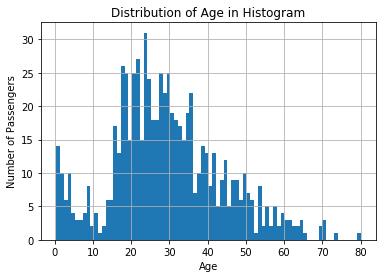

In [13]:
# Exam the distribution of age - histogram

%matplotlib inline
%pylab inline

ax = titanic_clean['Age'].hist(bins = 80)
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age in Histogram')

Populating the interactive namespace from numpy and matplotlib


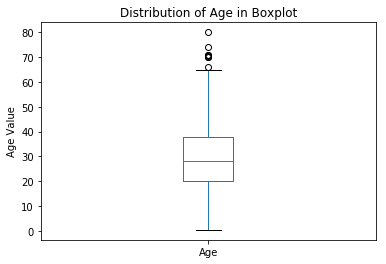

In [14]:
# Exam the distribution of age - boxplot

%matplotlib inline
%pylab inline

bp = titanic_clean['Age'].plot.box()
bp.set_ylabel('Age Value')
bp.set_title('Distribution of Age in Boxplot')

In [15]:
titanic_clean.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean age is 29.64. We can replace the missing age values with the mean age.

In [16]:
missing_ages = titanic_clean[titanic_clean['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = titanic_clean.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace with the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

titanic_clean['Age'] =titanic_clean.apply(remove_na_ages, axis=1)

/Users/johnngo/anaconda/envs/dataanalyst/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
titanic_clean.Age.describe()

count    889.000000
mean      29.268362
std       13.245995
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
# Removing columns Name and Ticket
titanic_clean=titanic_clean.drop(['Name','Ticket'], axis=1)
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


# Data Exploration Process & Predictions

Now we have a clean dataset to work with. We can start the data exploration process and begin answering the questions proposed earlier.

## Question 1. What is the percentage of people survived?


In [28]:
# the number of people survived
survived = titanic_clean.Survived 

# Calculate the total number of passengers survived
sum(survived)

# Calculate the total number of passengers
total_survived =len(titanic_clean)

# Calculate the percentage survived

print (sum(survived) * 100/total_survived)

38.2452193476


Based on our calculation, we see that about 38.25% of the passenger on the titanic survived.

## Question 2. Are woman more likely to survive than men? Are the survival rate different across age groups? Do higher passenger classes play a role?

In [56]:
# Finding the percentage of female passengers who survived
pct_female_survived = len(titanic_clean[(titanic_clean['Survived'] == 1) & (titanic_clean['Sex'] == 'female')])/(len(female_pass)*1.0)*100
print ('{} = {}'.format('Percent of surviving Females', np.around(pct_female_survived, decimals=2)))

# Finding the percentage of male passengers who survived
pct_male_survived = len(titanic_clean[(titanic_clean['Survived'] == 1) & (titanic_clean['Sex'] == 'male')])/(len(male_pass)*1.0)*100
print ('{} = {}'.format('Percent of surviving Males', np.around(pct_male_survived, decimals=2)))

Percent of surviving Females = 73.57
Percent of surviving Males = 18.89


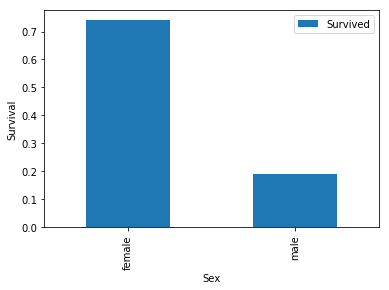

In [21]:
# Evaluate the average rate of survival of men and womean?

plot_sex = titanic_clean.groupby(['Sex'])[['Survived']].mean().plot(kind='bar').set_ylabel('Survival')

Based on the above graph, we see that the number of surviving male(18.89%) is far less than the number of surviving females(73.57%) eventhough the number of males far exceeded the number for females. In my opinion, this was due to the evacuation process where women, children and elderly were first to board the lifeboats.

Number of Children = 113
Number of Adults = 776
Number of surviving children = 61
Number of surviving adults = 279
Percent of surviving children = 53.98 %
Percent of surviving adults = 35.95 %


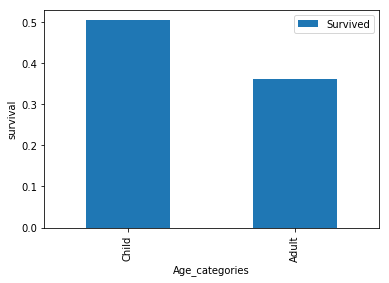

In [57]:
# Finding the number of children and adults who were onboard
num_of_children = len(titanic_clean[titanic_clean['Age'] < 18])
num_of_adults = len(titanic_clean[titanic_clean['Age'] >= 18])

## In most countries of the world, minor is legally defined as a person under the age of 18
num_of_children_who_survived= len(titanic_clean[(titanic_clean['Age'] < 18) & (titanic_clean['Survived'] == 1)])
num_of_adults_who_survived= len(titanic_clean[(titanic_clean['Age'] >= 18) & (titanic_clean['Survived'] == 1)])

print ('{} = {}'.format('Number of Children',  num_of_children))
print ('{} = {}'.format('Number of Adults', num_of_adults))
print ('{} = {}'.format('Number of surviving children', num_of_children_who_survived))
print ('{} = {}'.format('Number of surviving adults', num_of_adults_who_survived))

##Finding percentages of children and adults who survived
percent_children_who_survived = num_of_children_who_survived*1.0/num_of_children * 100
percent_adults_who_survived = num_of_adults_who_survived*1.0/num_of_adults * 100

print ('{} = {} %'.format('Percent of surviving children', np.around(percent_children_who_survived, decimals=2)))
print ('{} = {} %'.format('Percent of surviving adults', np.around(percent_adults_who_survived, decimals=2)))

# Evaluating the average rate of survival of different age group

titanic_clean['Age_categories'] = pd.cut(titanic_clean['Age'], bins=[0,18,90], labels = ['Child','Adult'])
titanic_clean.groupby(['Age_categories'])[['Survived']].mean().plot(kind='bar').set_ylabel('survival')

With these statistics, it is evident that there is a higher percentage(53.98%) of children (less than 18) survived compared to adults(35.95%). This may be the result of the women and children who were the first to be evacuated in the lifeboats when the ship started sinking.

In [60]:
# Finding the number of passengers a part of first, second and third class

firstclass= len(titanic_clean[titanic_clean['Pclass'] == 1])
secondclass= len(titanic_clean[titanic_clean['Pclass'] == 2])
thirdclass= len(titanic_clean[titanic_clean['Pclass'] == 3])

# Find the number of passengers a part of first, second and third class who survived

firstclass_survived = len(titanic_clean[(titanic_clean['Pclass'] == 1) & (titanic_clean['Survived'] == 1)])
secondclass_survived = len(titanic_clean[(titanic_clean['Pclass'] == 2) & (titanic_clean['Survived'] == 1)])
thirdclass_survived = len(titanic_clean[(titanic_clean['Pclass'] == 3) & (titanic_clean['Survived'] == 1)])

print ('{} = {}'.format('First Class Passengers', firstclass))
print ('{} = {}'.format('Second Class Passengers', secondclass))
print ('{} = {}'.format('Third Class Passengers', thirdclass))
print ('{} = {}'.format('Surviving First Class Passengers', firstclass_survived))
print ('{} = {}'.format('Surviving Second Class Passengers', secondclass_survived))
print ('{} = {}'.format('Surviving Third Class Passengers', thirdclass_survived))

First Class Passengers = 214
Second Class Passengers = 184
Third Class Passengers = 491
Surviving First Class Passengers = 134
Surviving Second Class Passengers = 87
Surviving Third Class Passengers = 119


In [61]:
# Finding percentages of people belonging to the first, second, third class who survived
percent_surviving_firstclass = firstclass_survived*1.0/firstclass * 100
percent_surviving_secondclass = secondclass_survived*1.0/secondclass * 100
percent_surviving_thirdclass = thirdclass_survived*1.0/thirdclass * 100

print ('{} = {} %'.format('Percent of surviving First Class Passengers', np.around(percent_surviving_firstclass, decimals=2)))
print ('{} = {} %'.format('Percent of surviving Second Class Passengers', np.around(percent_surviving_secondclass, decimals=2)))
print ('{} = {} %'.format('Percent of surviving Third Class Passengers', np.around(percent_surviving_thirdclass, decimals=2)))

Percent of surviving First Class Passengers = 62.62 %
Percent of surviving Second Class Passengers = 47.28 %
Percent of surviving Third Class Passengers = 24.24 %


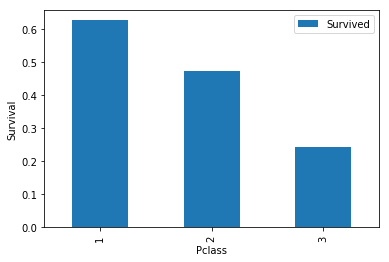

In [26]:
# Exam the average rate of survival across passenger classes
titanic_clean.groupby(['Pclass'])[['Survived']].mean().plot(kind='bar').set_ylabel('Survival')

Evidently, we see that significantly more first Class passengers (62.62%) survived compared to 2nd Class (47.28%) and 3rd Class (24.24%) passengers.

## Question 3. Are people with higher fare more likely to survive?

In [59]:
# Finding the number of low fare passenger and high fare passenger who were onboard
lowfare = len(titanic_clean[titanic_clean['Fare'] < 14])
highfare = len(titanic_clean[titanic_clean['Fare'] >= 15])

## In most countries of the world, minor is legally defined as a person under the age of 18
num_of_lowfare_survived= len(titanic_clean[(titanic_clean['Fare'] < 14) & (titanic_clean['Survived'] == 1)])
num_of_highfare_survived= len(titanic_clean[(titanic_clean['Fare'] >= 15) & (titanic_clean['Survived'] == 1)])

print ('{} = {}'.format('Number of low fare passenger',  lowfare))
print ('{} = {}'.format('Number of high fare passenger', highfare))
print ('{} = {}'.format('Number of surviving low fare passenger', num_of_lowfare_survived))
print ('{} = {}'.format('Number of surviving high fare passenger', num_of_highfare_survived))

##Finding percentages of children and adults who survived
percent_lowfare_who_survived = num_of_lowfare_survived*1.0/lowfare * 100
percent_highfare_who_survived = num_of_highfare_survived*1.0/highfare * 100

print ('{} = {} %'.format('Percent of surviving low fare passenger', np.around(percent_lowfare_who_survived, decimals=2)))
print ('{} = {} %'.format('Percent of surviving high fare passenger', np.around(percent_highfare_who_survived, decimals=2)))

Number of low fare passenger = 436
Number of high fare passenger = 432
Number of surviving low fare passenger = 111
Number of surviving high fare passenger = 226
Percent of surviving low fare passenger = 25.46 %
Percent of surviving high fare passenger = 52.31 %


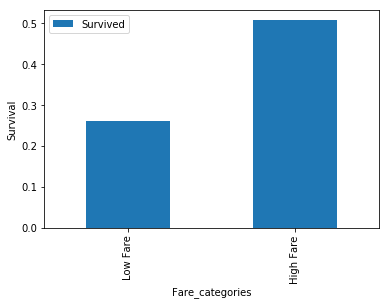

In [25]:
titanic_clean['Fare_categories'] = pd.cut(titanic_clean['Fare'], bins=[0,14,513], labels = ['Low Fare','High Fare'])
titanic_clean.groupby(['Fare_categories'])[['Survived']].mean().plot(kind='bar').set_ylabel('Survival')

Based on the graph, people with higher fare are more likely to survive(52.31%) vs low fare(25.46%), perhaps its similar to our first class passenger who may have paid more to have a better space on the boat which may have had easier access to the lifeboats.


## Question 4. Are people with big family more or less likely to survive?

In [27]:
# Create new variable 'Family size'

titanic_clean['Family_size'] = titanic_clean['SibSp'] + titanic_clean['Parch']

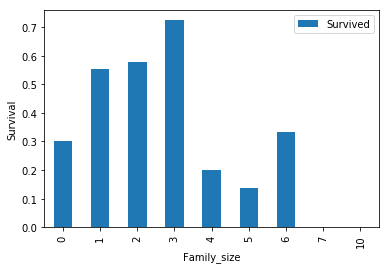

In [29]:
# Exam the average rate of survival across number of family members

titanic_clean.groupby(['Family_size'])[['Survived']].mean().plot(kind='bar').set_ylabel('Survival')

Based on our observation, we discover that family size greater then 3 lowers the chances of survival. Perhaps, this may be because a larger family size may let the younger member of the family to board the lifeboat first. 

# Conclusion 

With our analysis, we have been able to gain insights into the titanic data set. We were able to uncover some important factors that played a role in the survival of the passengers on board the titanic. 

(i) 38.25% of the passenger on the titanic survived.

(ii) The number of surviving male(18.89%) is far less than the number of surviving females(73.57%) eventhough the number of males far exceeded the number of females.It is evident that there is a higher percentage(53.98%) of children (less than 18) survived compared to adults(35.95%).Evidently we see significantly more first Class passengers (62.62%) survived compared to second Class (47.28%) and third Class (24.24%) passengers.

(iii) People who paid for the higher fare are more likely to survive(52.31%) vs low fare(25.46%)

(iv) We discover that family size greater then 3 lowers the chances of survival.


# References

    * https://www.kaggle.com/c/titanic/data
    * https://www.tutorialspoint.com/python/python_functions.htm
    * https://matplotlib.org/examples/index.html